<a href="https://colab.research.google.com/github/santosh2580/Amazon-clone/blob/main/Fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load datasets from Google Drive
fake_df = pd.read_csv('/content/drive/My Drive/Fake.csv')
true_df = pd.read_csv('/content/drive/My Drive/True.csv')


In [ ]:
# Add labels
fake_df['label'] = 0  # FAKE news
true_df['label'] = 1  # REAL news


In [ ]:

# Combine datasets
df = pd.concat([fake_df, true_df], ignore_index=True)
print("Datasets Loaded and Combined Successfully")

Datasets Loaded and Combined Successfully


In [ ]:
# Display first few rows
display(df.head())

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
# Drop missing values
df.dropna(inplace=True)

In [ ]:
# Preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

In [ ]:
# Apply preprocessing
df['clean_text'] = df['text'].astype(str).apply(clean_text)

In [ ]:
# Split data into train and test (reduce dataset size for faster training)
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Train Logistic Regression model (increase max_iter to avoid slow convergence)
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9839643652561247
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4733
           1       0.98      0.98      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [ ]:
# Train Support Vector Machine model (use a subset for faster training)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_tfidf, y_train, test_size=0.7, random_state=42)
svm_model = SVC(kernel='linear', C=0.1)  # Lower C speeds up training
svm_model.fit(X_train_sample, y_train_sample)
y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9646993318485524
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4733
           1       0.97      0.96      0.96      4247

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [ ]:
# Train Random Forest model (reduce estimators for faster training)
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.984521158129176
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4733
           1       0.99      0.98      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [ ]:
# Function to Predict News Authenticity
def predict_news(text):
    clean_input = clean_text(text)
    vectorized_input = vectorizer.transform([clean_input])
    prediction = lr_model.predict(vectorized_input)[0]
    return "REAL" if prediction == 1 else "FAKE"

In [ ]:
# Test the function
sample_text = "Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing"
print("Prediction for Sample News:", predict_news(sample_text))

Prediction for Sample News: FAKE


<ipython-input-17-cdbf6f46aac5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='coolwarm')


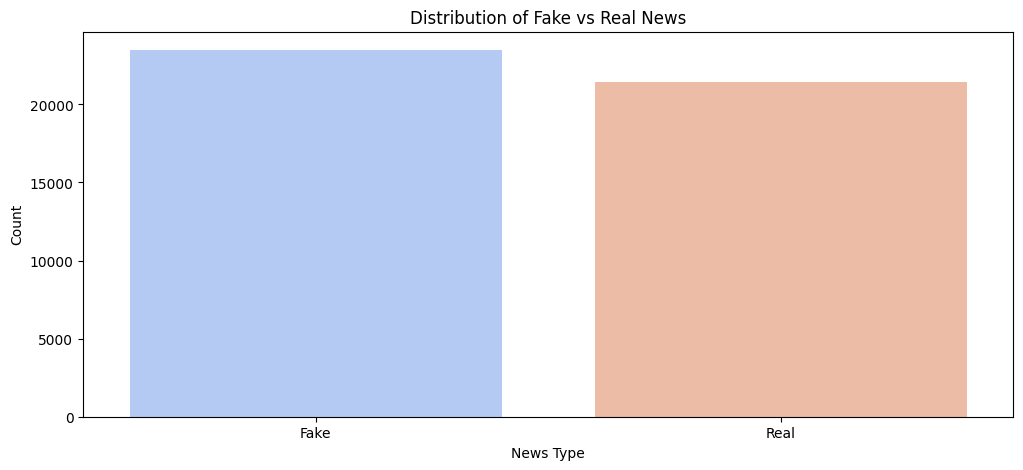

In [ ]:
# Visualizations
plt.figure(figsize=(12,5))
sns.countplot(x=df['label'], palette='coolwarm')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.xlabel("News Type")
plt.ylabel("Count")
plt.title("Distribution of Fake vs Real News")
plt.show()

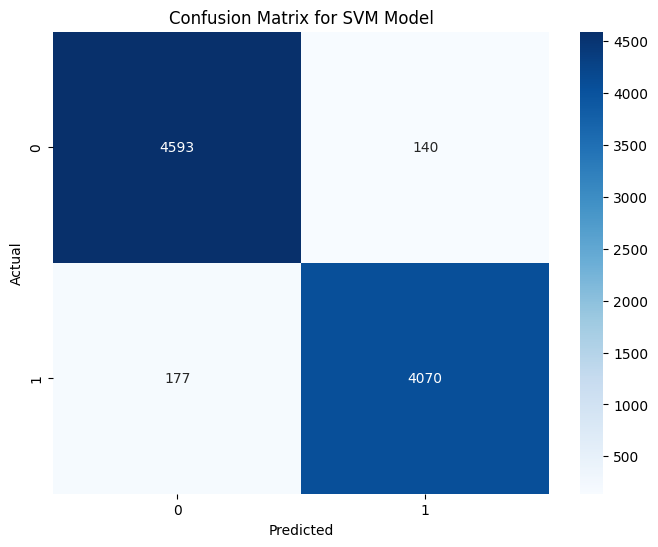

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM Model")
plt.show()
